# Concrete Strength Prediction
### By Camilo Sierra

## Objective 

### To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.Resources Available The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

## Steps -

### Exploratory data quality report reflecting the following:

1) Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers, duplicates(10 Marks).

2) Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. (10 marks)

3) Feature Engineering techniques(10 marks)a.Identify opportunities (if any) to extracta new featurefrom existing features, drop a feature(if required)b.Get data model ready and do a train test split.c.Check for higher degree attributes, should it be linear, quadraticor higherdegree? Use Polynomial Features(Considerdegree 2 and 3).

### Creatingthe model and tuning it

1) Algorithms that you think will be suitable for this project.Use Kfold Cross Validation toevaluate model performance.Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics.(at least 3 algorithms, one bagging and one boosting based algorithms has to be there).(15 marks)

2) Techniques employed to squeeze that extra performance out of the model without making it overfit.Use Grid Search orRandom Search on any of the two modelsused above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

## Data loading and preprocessing

In [1]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics



from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings


In [2]:
# Import Data set
df=pd.read_csv('concrete.csv')


In [3]:
# Number of rows and columns
df.shape

(1030, 9)

In [4]:
# Visualize first 5 rows.
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
# verifing null values counts.
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
#Get basic statistical analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


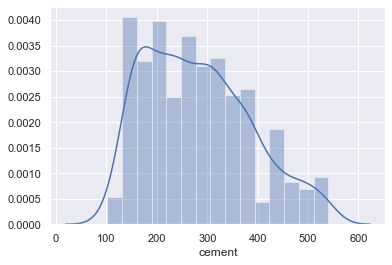

In [8]:
sns.distplot(df['cement']);

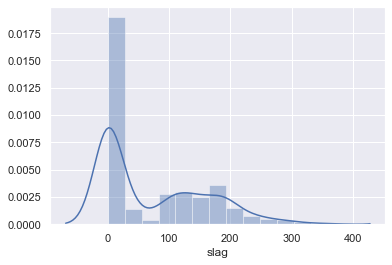

In [9]:
sns.distplot(df['slag']);

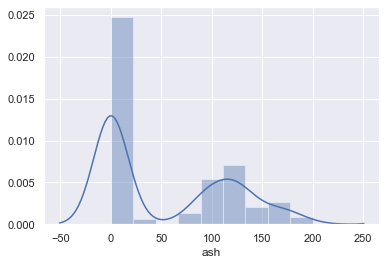

In [10]:
sns.distplot(df['ash']);

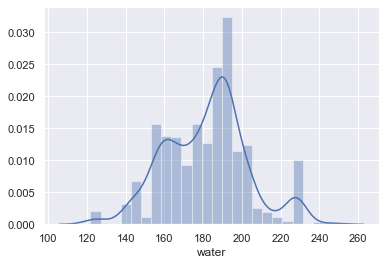

In [11]:
sns.distplot(df['water']);

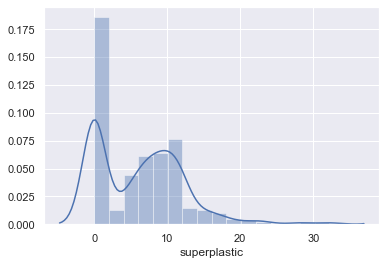

In [12]:
sns.distplot(df['superplastic']);

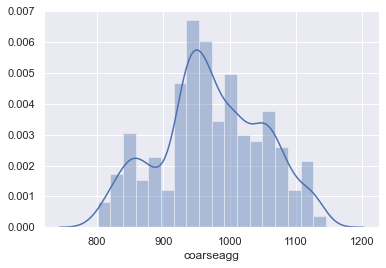

In [13]:
sns.distplot(df['coarseagg']);

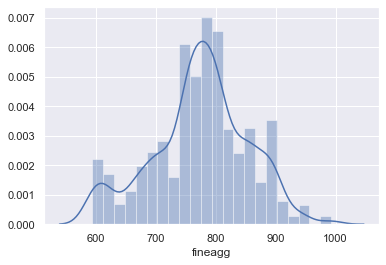

In [14]:
sns.distplot(df['fineagg']);

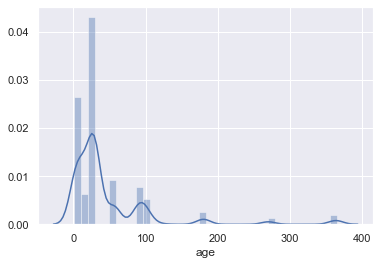

In [15]:
sns.distplot(df['age']);

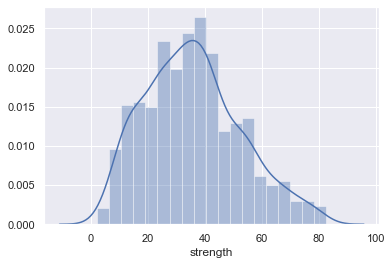

In [16]:
sns.distplot(df['strength']);

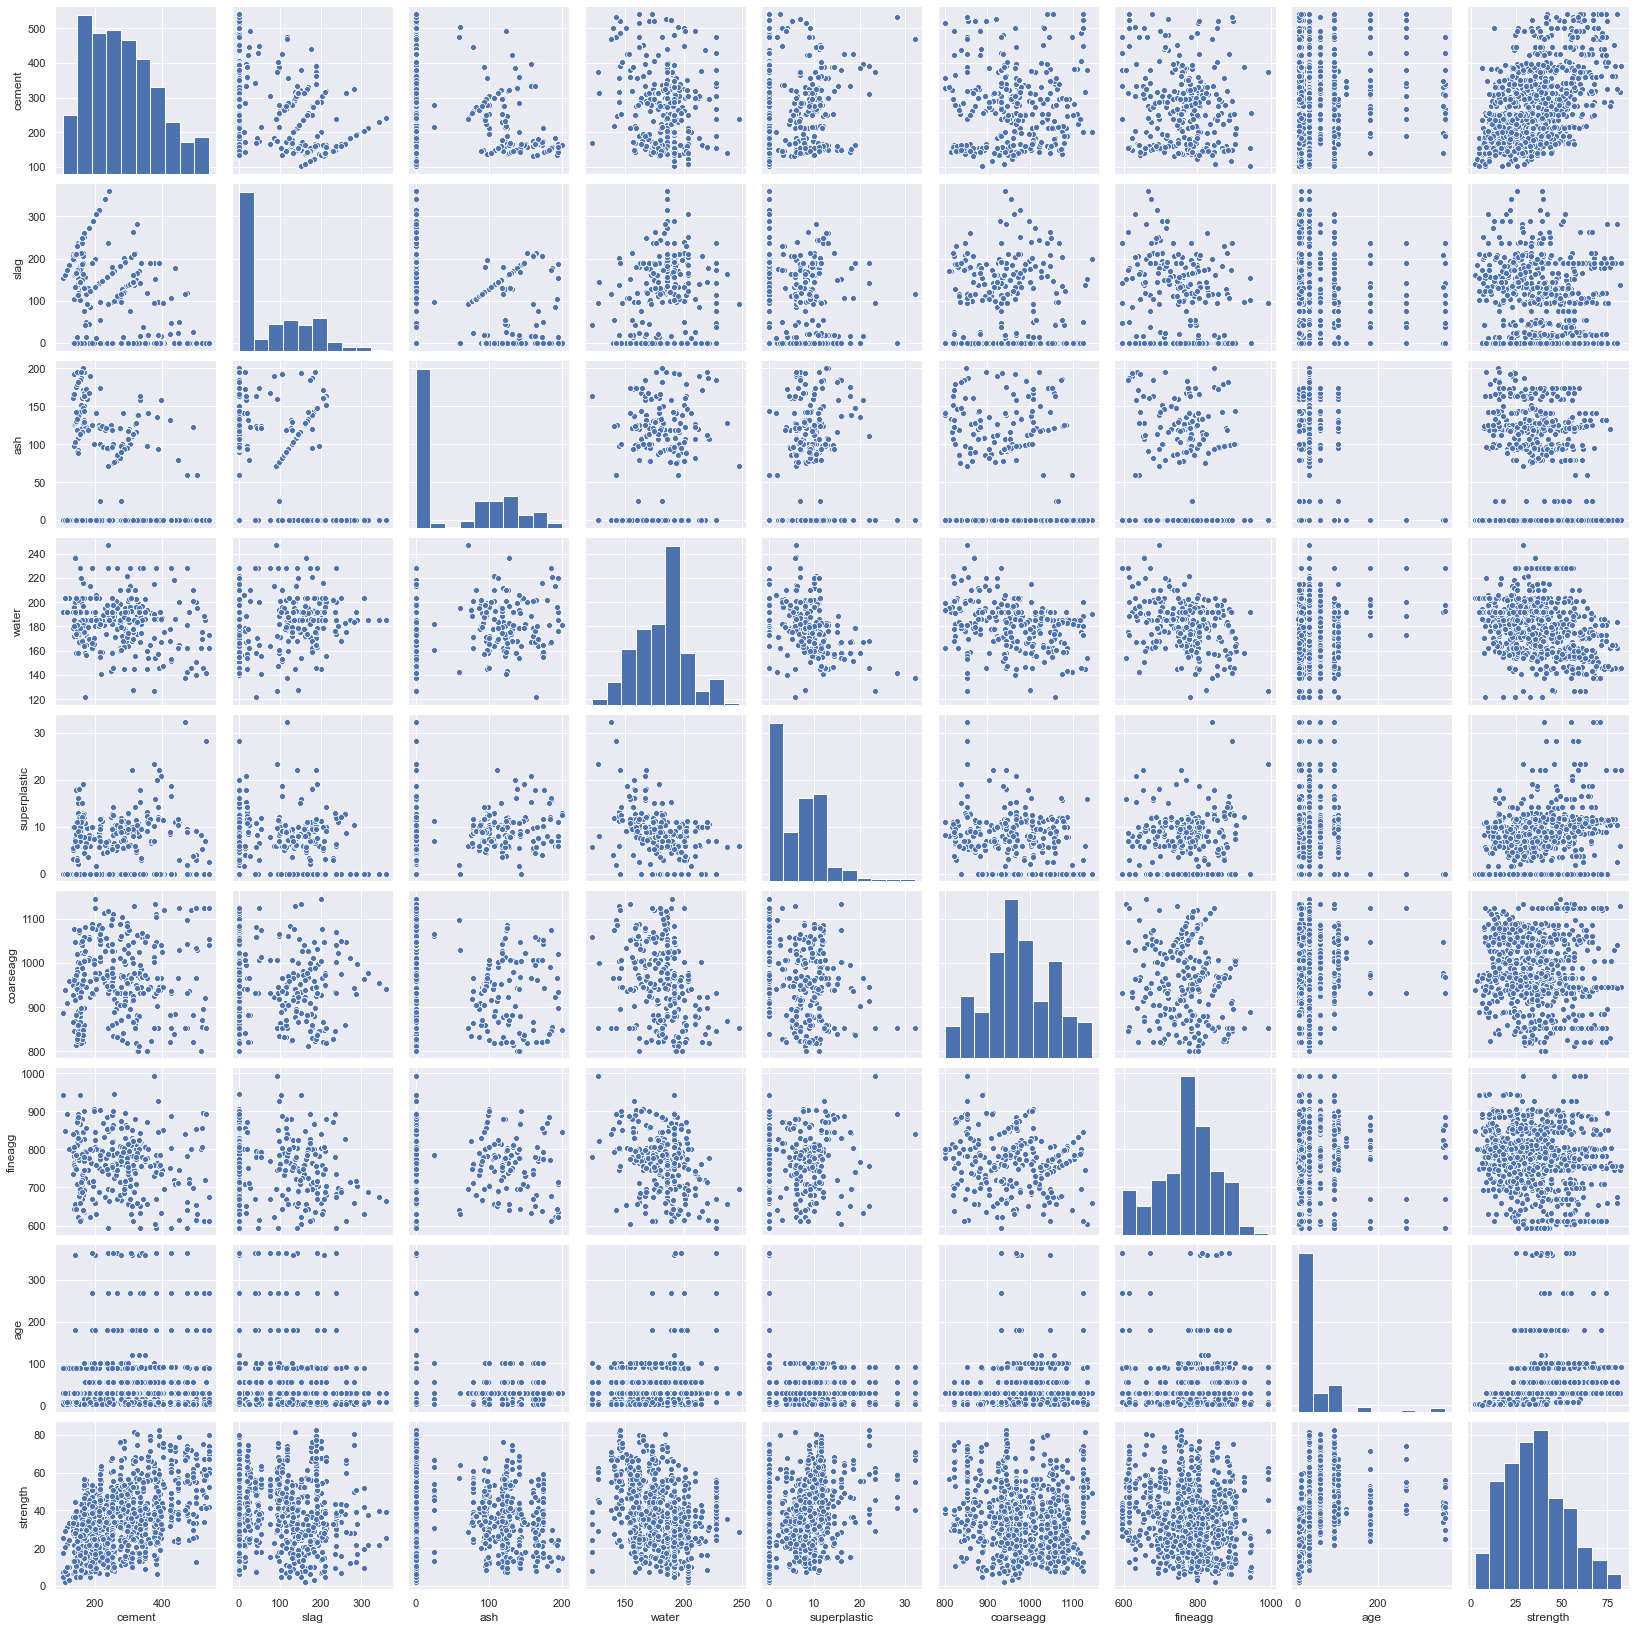

In [17]:
sns.pairplot(df);

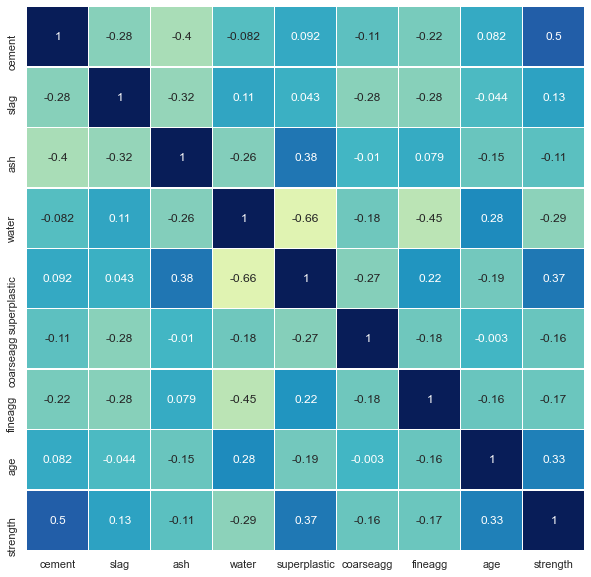

In [18]:
#Visualize potential numerical variable correlations.

plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

# ML Model building

## Spliting Data

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('strength',axis=1)     # Predictor feature columns 
Y = df['strength']   # Predicted class (1=True, 0=False)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((721, 8), (721,), (309, 8), (309,))

## Linear Regresion Model

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train) # Fitting Linear Regression to the Training set

print('Coefficient b1', regressor.coef_)
print('Intercept b0', regressor.intercept_)

Coefficient b1 [ 0.12655756  0.10882841  0.09070514 -0.10315724  0.37612343  0.02402859
  0.03619289  0.11043497]
Intercept b0 -52.963271158912875


In [21]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [22]:
print('Accuracy of training data set: ', regressor.score(x_train, y_train))
print('Accuracy of testing data set: ', regressor.score(x_test, y_test))

Accuracy of training data set:  0.603148754063023
Accuracy of testing data set:  0.6339136715208276


In [23]:
#evaluating performace
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print("Root Mean Square Error: ", rmse)
print("R2 Score:", r2)


Root Mean Square Error:  10.322092985364211
R2 Score: 0.6339136715208276


## Desicion Tree Model

In [24]:
#importing Libraries 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

from yellowbrick.classifier import ClassificationReport, ROCAUC



C:\Users\csier\Anaconda2\envs\CS_Phyton_3_6\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [25]:
#Building model , Fitting model
DTR=DecisionTreeRegressor()


In [26]:
#fiting the model
DTR.fit(x_train, y_train)

DecisionTreeRegressor()

In [27]:
#Performande on train data
DTR.score(x_train, y_train)


0.9948592423407845

In [28]:
DTR.score(x_test,y_test)

0.8650922371960297

In [29]:
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print("Root Mean Square Error: ", rmse)
print("R2 Score:", r2)

Root Mean Square Error:  10.322092985364211
R2 Score: 0.6339136715208276


## Random Forest Model

In [30]:
#Build RF Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
RFR=rf.fit(x_train, y_train)

In [31]:
y_pred=rf.predict(x_test)
y_pred

array([42.694     , 45.5714    , 31.928     , 23.4514    , 16.8429    ,
       25.0836    , 43.90295714, 64.5469    , 20.4076    , 30.2838    ,
       34.3956    , 11.7674    , 43.5918    , 18.6104    , 52.6099    ,
       31.6152    , 33.0874    , 23.2643    , 27.9981    , 30.5149    ,
       22.6992    , 30.782     , 15.6634    , 45.5021    , 31.1035    ,
       64.242825  , 38.7637    , 34.865     , 34.6318    , 33.126     ,
       14.181     , 37.9061    , 34.0593    , 40.6251    , 28.845     ,
       46.6822    , 12.5287    , 15.5134    , 22.992     , 48.0639    ,
       15.4157    , 27.3124    , 71.8263    , 77.572     , 30.9403    ,
       44.0181    , 25.3307    , 15.0107    , 32.4974    , 45.9763    ,
       55.4989    , 36.1894    , 13.421     , 14.0735    , 17.8159    ,
       35.3697    ,  8.8274    , 35.3518    , 13.1916    , 49.5345    ,
       37.8627    , 46.2308    , 25.907     , 76.8146    , 61.31090119,
       48.3459    , 20.6433    , 12.1467    , 23.53256667, 21.69

In [32]:
rf.score(x_train,y_train)

0.9829169825267728

In [33]:
rf.score(x_test,y_test)

0.9031241841831348

In [34]:
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print("Root Mean Square Error: ", rmse)
print("R2 Score:", r2)

Root Mean Square Error:  5.309867673834659
R2 Score: 0.9031241841831348


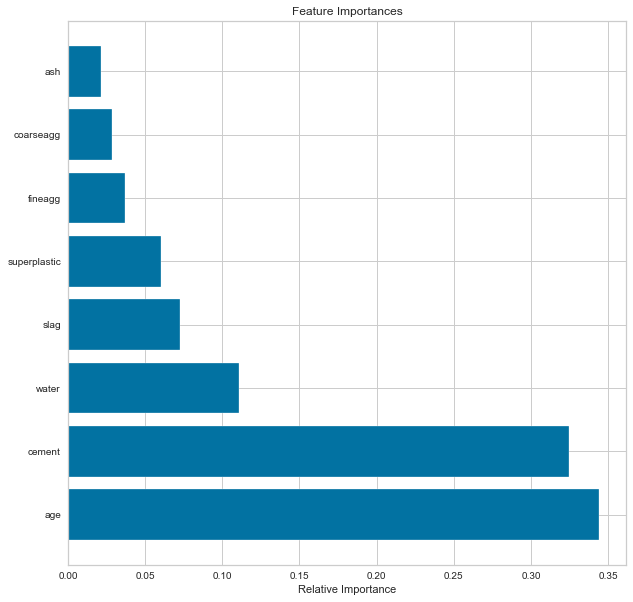

In [35]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]
a = df.columns[:]
features= a.drop('strength',1)
#plot it
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

# Model Tunning




In [36]:
#Drop low impact variables
df1=df.drop(['coarseagg','ash'],axis=1)
df1.shape

(1030, 7)

In [37]:
df1.head()

,cement,slag,water,superplastic,fineagg,age,strength
0,141.3,212.0,203.5,0.0,748.5,28,29.89
1,168.9,42.2,158.3,10.8,796.2,14,23.51
2,250.0,0.0,187.4,5.5,861.2,28,29.22
3,266.0,114.0,228.0,0.0,670.0,28,45.85
4,154.8,183.4,193.3,9.1,696.7,28,18.29


## Split Data New Data Set

In [38]:
from sklearn.model_selection import train_test_split

X = df1.drop('strength',axis=1)     # Predictor feature columns 
Y = df1['strength']   # Predicted class (1=True, 0=False)

x1_train, x1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x1_train.shape,y1_train.shape,x1_test.shape,y1_test.shape

((721, 6), (721,), (309, 6), (309,))

## New linear models with most relevant variables

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x1_train, y1_train) # Fitting Linear Regression to the Training set

print('Coefficient b1', regressor.coef_)
print('Intercept b0', regressor.intercept_)

Coefficient b1 [ 0.07899472  0.05456902 -0.20535703  0.63284339 -0.00906919  0.1035784 ]
Intercept b0 45.09930137562642


In [40]:
# Predicting the Test set results
y1_pred = regressor.predict(x1_test)

In [41]:
print('Accuracy of training data set: ', regressor.score(x1_train, y1_train))
print('Accuracy of testing data set: ', regressor.score(x1_test, y1_test))

Accuracy of training data set:  0.5795849488169068
Accuracy of testing data set:  0.6066371768582695


In [42]:
#evaluating performace
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y1_test, y1_pred)**0.5
r2 = r2_score(y1_test, y1_pred)

print("Root Mean Square Error: ", rmse)
print("R2 Score:", r2)

Root Mean Square Error:  10.699726285111721
R2 Score: 0.6066371768582695


In [43]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [44]:
# Creating a Ridge Regression Model
Rd = Ridge()
Rd.fit(x1_train, y1_train) # Fitting Linear Regression to the Training set
print('Coefficient b1', Rd.coef_)
print('Intercept b0', Rd.intercept_)

Coefficient b1 [ 0.07899493  0.05456932 -0.2053636   0.6328018  -0.00906916  0.10357823]
Intercept b0 45.100654397150485


In [45]:
# Predicting the Test set results
y1_pred = Rd.predict(x1_test)

In [46]:
print('Accuracy of training data set: ', Rd.score(x1_train, y1_train))
print('Accuracy of testing data set: ', Rd.score(x1_test, y1_test))

Accuracy of training data set:  0.5795849486903659
Accuracy of testing data set:  0.606637498621897


In [47]:
rmse = mean_squared_error(y1_test, y1_pred)**0.5
r2 = r2_score(y1_test, y1_pred)

print("Root Mean Square Error: ", rmse)
print("R2 Score:", r2)

Root Mean Square Error:  10.699721909020179
R2 Score: 0.606637498621897


In [48]:
# CrEating a Lasso Model
M_lasso = Lasso()
M_lasso.fit(x1_train, y1_train) # Fitting Linear Regression to the Training set
print('Coefficient b1', M_lasso.coef_)
print('Intercept b0', M_lasso.intercept_)

Coefficient b1 [ 0.079227    0.05478405 -0.20912593  0.59209901 -0.00861734  0.10299882]
Intercept b0 45.63444004801622


In [49]:
rmse = mean_squared_error(y1_test, y1_pred)**0.5
r2 = r2_score(y1_test, y1_pred)

print("Root Mean Square Error: ", rmse)
print("R2 Score:", r2)

Root Mean Square Error:  10.699721909020179
R2 Score: 0.606637498621897


## Implementing Cross Validation to Lasso Model

In [50]:
from sklearn.model_selection import cross_val_score

score1 = cross_val_score(M_lasso, X, Y, cv = 10).mean()
print(f'Cross validation score of Lasso  = {score1}')

Cross validation score of Lasso  = 0.569557007547068


## K-fold cross-validation - Lasso Model

k-fold cross validation( without stratification)

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [52]:
num_folds = 10
seed = 77

In [81]:
kfold = KFold(n_splits=num_folds, random_state= True)

In [54]:
results = cross_val_score(M_lasso,X, Y, cv=kfold)
results

array([0.49333898, 0.64617642, 0.69631366, 0.54542993, 0.52255147,
       0.62552919, 0.57476753, 0.59525571, 0.44188674, 0.55432045])

In [55]:
np.mean(abs(results))

0.569557007547068

# Decision Tree 

In [56]:
# Decision Tree
DTR1=DecisionTreeRegressor()

In [57]:
DTR1.fit(x1_train, y1_train)

DecisionTreeRegressor()

In [58]:
#Performande on train data
DTR1.score(x1_train, y1_train)

0.9948591508254903

In [59]:
#Performande on train data
DTR1.score(x1_test, y1_test)

0.8352943339898485

## Implementing Cross Validation to the Decision Tree

In [60]:
from sklearn.model_selection import cross_val_score
#For Decision Tree dt
score1 = cross_val_score(DTR1, X, Y, cv = 10).mean()
print(f'Cross validation score of Decision tree = {score1}')

Cross validation score of Decision tree = 0.8695359641581163


## K-fold cross-validation Decision Tree

In [61]:
num_folds = 10
seed = 77

In [62]:
kfold = KFold(n_splits=num_folds, random_state=True)

C:\Users\csier\Anaconda2\envs\CS_Phyton_3_6\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [63]:
results = cross_val_score(DTR1,X, Y, cv=kfold)
results

array([0.8194458 , 0.84600281, 0.91661038, 0.88718146, 0.81694095,
       0.92025825, 0.89716789, 0.88422545, 0.85617426, 0.87804335])

In [64]:
np.mean(abs(results))

0.8722050597899024

# Random Forest

## Implementing Cross Validation to the Random Forest

In [65]:
rf0=RandomForestRegressor()

In [66]:
rf0.fit(X,Y)

RandomForestRegressor()

In [67]:
from sklearn.model_selection import cross_val_score
#For Decision Tree dt
score2 = cross_val_score(rf0, X, Y, cv = 10).mean()
print(f'Cross validation score of RandomForest = {score2}')

Cross validation score of RandomForest = 0.9156719694679328


## K-fold cross-validation Random Forest

In [68]:
num_folds = 10
seed = 77

In [80]:
kfold = KFold(n_splits=num_folds, random_state =True)

In [70]:
results = cross_val_score(rf0,X, Y, cv=kfold)
results

array([0.89018214, 0.89924347, 0.95429012, 0.92248914, 0.87985448,
       0.93103408, 0.93363566, 0.9166364 , 0.91290024, 0.93060488])

In [71]:
np.mean(abs(results))

0.9170870608666414

## Implementing RandomizedSearchCV

In [72]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [73]:
rf1 = RandomForestRegressor()

In [74]:
rf1_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [75]:
rf1_random.fit(X,Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 15.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [76]:
rf1_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [78]:
# CReating a new RF model with best Parameters.
rf2 = RandomForestRegressor(bootstrap= True,
 max_depth= 70,
 min_samples_split= 2,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 n_estimators= 800)

score2 = cross_val_score(rf2, X, Y, cv = 5).mean()

score2

0.9051974113649571

# Conclusion

## Out of the several models build, Random Forest K - Fold CV has the best performance. Accuracy = 0.917